In [1]:
import sys
sys.path.append("../protosp01/skillExtract/")
from utils import detect_language, split_sentences


import pandas as pd
import json
from tqdm.notebook import tqdm
import seaborn as sns

tqdm.pandas()

In [2]:
with open("../data/raw/vacancies.json", "r") as f:
    df = pd.DataFrame(json.load(f))

df.head()

,id,name,orig_url,company_name,company_url,lead,description
0,4623,Business Analyst Leistungen,https://www.jobs.ch/en/vacancies/detail/70cabf...,ELCA Informatik AG,https://www.jobs.ch/en/companies/11529-elca-in...,None,Um unser Wachstum weiterhin erfolgreich fortzu...
1,15,Securities Master Data Specialist (Ref. 2177),https://www.jobs.ch/en/vacancies/detail/0f8346...,None,None,None,"<!DOCTYPE html>\n<html lang=""en"" data-template..."
2,2226,IT Supporter (m/w),https://www.jobs.ch/en/vacancies/detail/e72b68...,univativ Schweiz AG,https://www.jobs.ch/en/companies/95851-univati...,"Ob Student, Berufseinsteiger oder Berufserfahr...",Karrierelevel: Berufseinsteiger Pensum: 80-10...
3,5,Scrum Master/-in & Applikations-Analyst/-in Ep...,https://www.jobs.ch/en/vacancies/detail/9a1fa7...,None,None,None,Das Luzerner Kantonsspital mit den Standorten ...
4,16,"Product Owner ""Financial Messaging"" for Multib...",https://www.jobs.ch/en/vacancies/detail/703709...,None,None,None,"<!DOCTYPE html>\n<html lang=""en"" data-template..."


In [3]:
df["lang"] = df.description.progress_apply(detect_language)

  0%|          | 0/13649 [00:00<?, ?it/s]

KeyboardInterrupt: 

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='lang', ylabel='doc_count'>

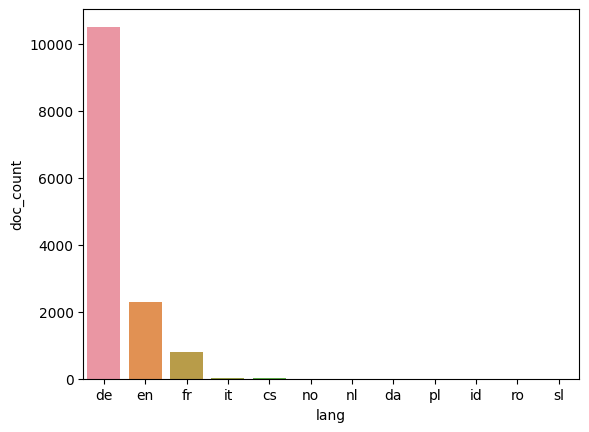

In [ ]:
langs = df[["lang", "id"]].groupby("lang").count().reset_index()
langs["doc_count"] = langs.id
langs = langs.drop("id", axis=1).sort_values("doc_count", ascending=False)
sns.barplot(data=langs, x="lang", y="doc_count")

In [ ]:
df_en = df[df.lang == "en"]
print(len(df_en.index))

2281


In [ ]:
df_en.to_csv("../data/raw/en_vacancies.csv")

#### Processing the english description

In [34]:
import pandas as pd
import seaborn as sns

df_en = pd.read_csv("../data/raw/en_vacancies.csv")

In [35]:
df_en["desc_len"] = df_en.description.apply(len)

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


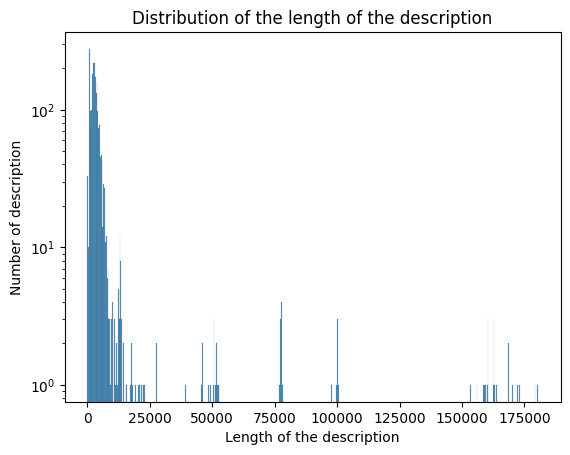

In [36]:
g = sns.histplot(data=df_en, x="desc_len")
g.set_title("Distribution of the length of the description")
g.set_xlabel("Length of the description")
g.set_ylabel("Number of description")
g.set_yscale("log")

/tmp/ipykernel_47099/3674572647.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df_en["is_html"] = df_en["description"].apply(lambda d : bool(BeautifulSoup(d, "html.parser").find()))
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/env

Text(0.5, 0, 'Is HTML ?')

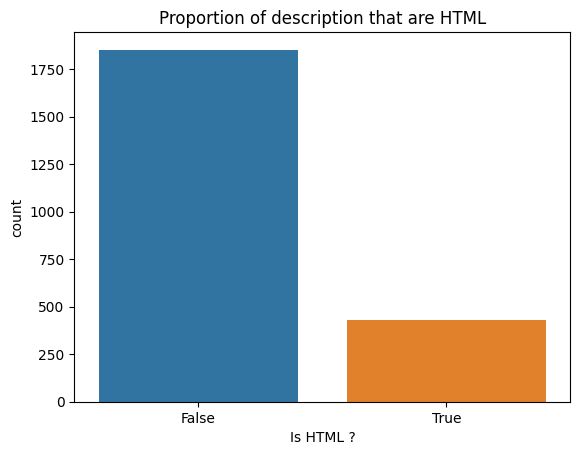

In [37]:
from bs4 import BeautifulSoup

df_en["is_html"] = df_en["description"].apply(lambda d : bool(BeautifulSoup(d, "html.parser").find()))

g = sns.countplot(data=df_en, x="is_html")
g.set_title("Proportion of description that are HTML")
g.set_xlabel("Is HTML ?")

In [38]:
html_desc = df_en[df_en["is_html"]]
list(html_desc["description"].values)

['<!DOCTYPE html>\n<html lang="en" data-template="jobs_standard_1">\n<head>\n  <meta charset="utf-8">\n  <base href="https://img.jobs.ch/www/job-ad-template/template/" />\n  <meta name="keywords" content="">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n  <!-- NOTE: Please change the timestamp of the css file if it has changed. -->\n  <link rel="stylesheet" type="text/css" importance="high" fetchpriority="high"  href="https://img.jobs.ch/www/job-ad-template/template/css/two-col-left-new.css?t=20221220">\n  <!-- Because of client caching issues! Please check the readme -->\n  <title>Securities Master Data Specialist (Ref. 2177)</title>\n</head>\n<body>\n  <header class="header">\n    <div class="container">\n      <div class="header--grid">\n        <div class="header--intro"></div>\n        <h1 style="overflow-wrap: break-word; word-break: break-word; hyphens: auto;">Securities Master Data Specialist (Ref. 2177)</h1>\n    </div>\n  </header>\n  <main class=

In [39]:
html_desc["extract"] = html_desc["description"].apply(lambda d : \
                                                      BeautifulSoup(d, "html.parser")\
                                                        .get_text())
print("Extracted ", len(html_desc.index), " description")
redirection_failure = """\n\n\n\n\n\nredirecting...\n\n\n\nRedirection to company website\nRedirection failed? Click here.\n\n\n"""
html_desc = html_desc[html_desc["extract"] != redirection_failure]
print("After redirection failure filtering ", len(html_desc.index), " samples kept")
html_desc["description"] = html_desc["extract"]
html_desc = html_desc.drop("extract", axis=1)

Extracted  428  description
After redirection failure filtering  115  samples kept


/tmp/ipykernel_47099/3172585833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  html_desc["extract"] = html_desc["description"].apply(lambda d : \


In [40]:
df = pd.concat([df_en[~df_en.is_html], html_desc])

In [41]:
import nltk
from nltk import sent_tokenize, word_tokenize
from transformers import AutoModel, AutoTokenizer
import numpy as np
nltk.download('punkt')

## loading the proper tokenizer to compute the number of tokens
tok = AutoTokenizer.from_pretrained("jjzha/jobbert-base-cased")


def get_number_of_tokens(s):
    if(s != np.nan):
        tokens = tok.tokenize(s)
        return len(tokens)


def sliding_window_gen(sentences, N):
    concat_sentences = []
    max_idx = len(sentences) - N
    if(max_idx <= 0):
        return []
    for i in range(max_idx):
        concat_sentences.append(" ".join(sentences[i:i + N]))
    return concat_sentences

df["sentences"] = df["description"].progress_apply(split_sentences)
print("> Sentences splitted")
df["nb_of_sentences"] = df["sentences"].progress_apply(len)
enhanced_df = df.copy() ## for later enhancing sentences
df = df.explode("sentences")
df["sentence_len"] = df["sentences"].progress_apply(get_number_of_tokens)
print("> computed number of tokens for simple sentences")

enhanced_df["enhanced_sentences"] = enhanced_df["sentences"].progress_apply(lambda sents : sliding_window_gen(sents, 2))
print("> Enhanced sentences")
enhanced_df = enhanced_df.explode("enhanced_sentences").dropna()
enhanced_df["sentence_len"] = enhanced_df["enhanced_sentences"].progress_apply(get_number_of_tokens)
print("> computed number of tokens for enhanced sentences")


[nltk_data] Downloading package punkt to /home/magron/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


  0%|          | 0/1968 [00:00<?, ?it/s]

> Sentences splitted


  0%|          | 0/1968 [00:00<?, ?it/s]

  0%|          | 0/53351 [00:00<?, ?it/s]

> computed number of tokens for simple sentences


  0%|          | 0/1968 [00:00<?, ?it/s]

> Enhanced sentences


  0%|          | 0/1217 [00:00<?, ?it/s]

> computed number of tokens for enhanced sentences


/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/

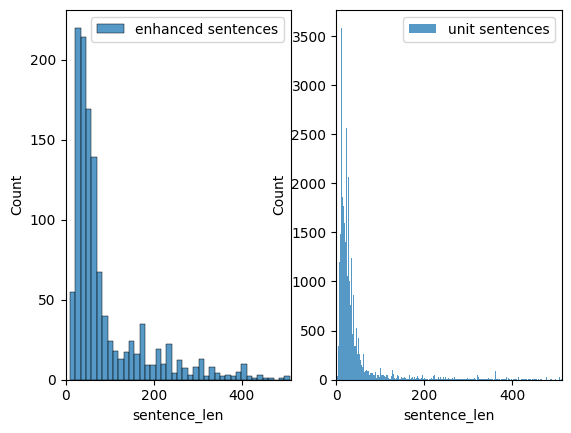

In [47]:
from matplotlib import pyplot as plt
f, a = plt.subplots(1, 2)
sns.histplot(data=enhanced_df, x="sentence_len", label="enhanced sentences", ax=a[0])
g = sns.histplot(data=df, x="sentence_len", label="unit sentences", ax=a[1])
a[0].set_xlim((0, 512))
a[1].set_xlim((0, 512))

a[1].legend()
a[0].legend()

Limiting to the sentences that fit JobBERT

In [48]:
df = df[df.sentence_len <= 512]
enhanced_df = enhanced_df[enhanced_df.sentence_len <= 512]

In [51]:
df.to_csv("../data/processed/real/job_offers_sentences.csv")
enhanced_df.to_csv("../data/processed/real/job_offers_compound_2.csv")